# This is a Basic Sentiment Analysis Project | @HPD1155
# Libraries Used
- Tensorflow/Keras - Used for defining, building, and training the model
- Pandas - Used for loading the dataset
- Numpy - Used for working with arrays
- Matplotlib - Used for plotting the data
- Scikit-learn - Used for splitting the data into train and test sets
- Math - Used for rounding.

Here is what you run to install everything. Paste it into your terminal:
```
pip install tensorflow keras pandas numpy matplotlib scikit-learn
```

# Importing necessary libraries

In [87]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
import math

# Load in our dataset
This will take out CSV filed named `data.csv` and create a dataframe out of it with **Pandas**.
X is going to be the input data. It is getting the column named `text` from the dataframe.
y is going to be the output data. It is getting the column named `label` from the dataframe.

In [88]:
df = pd.read_csv('data.csv') # Dataframe

X = df['text'] # Input data
y = df['label'] # Output data

# Preprocessing the data
The neural network can just understand plain letters like us. It needs to break them down and since it is a computer, it only knows numbers. We have to convert the text to numbers.

This can be done by "Tokenizing" the text. This means it will break down the text into individual words inside a list. Next you can convert the list of words into a list of numbers or "sequences". It will be a list of numbers. Each column will be a seperate array of numbers. It would be a seperate dimension or "section" of the X data. `Eg: [[2, 4, 6, 3, 2, 5] [1, 6, 8, 2, 4, 5]]`. What is padding you say? Machine learning models expect all the sequences to be the same dimension or same length so each sequence has a use, there are no "holes" in the sequence. This means that each sequence has a "use" or a way that the model can interact with it. Padding essentially makes all the sequences the same length or in this case the same dimension. `Eg: [[0, 0, 0, 0, 0, 0, 2, 4, 6, 3, 2, 5] [0, 0, 0, 0, 0, 0, 1, 6, 8, 2, 4, 5]]`. They are all 12 dimensions.

This section of code is going to do the following:
- Tokenize the text (Eg. "Hello, my name is John" -> ['Hello', 'my', 'name', 'is', 'John'])
- Convert the text to sequences (Eg. ['Hello', 'my', 'name', 'is', 'John'] -> [[3, 6, 8, 2, 4]])
- pad the sequences so they are all the same dimension (Eg. [[3, 6, 8, 2, 4], [3, 6, 8, 2, 4]] -> [[0, 0, 0, 0, 0, 0, 3, 6, 8, 2, 4], [0, 0, 0, 0, 0, 0, 3, 6, 8, 2, 4]]) This is because the model expects all the sequences to be the same dimension or same length so each sequence has a use, there are no "holes" in the sequence.

# Important Note
We aren't preprocessing the labels/y/output data because unlike X, the y is already in a numerical format that all has the same dimension. "1 and 0"

In [89]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Convert the text to sequences
X_seq = tokenizer.texts_to_sequences(X)

# pad the sequences so they are all the same dimension
X_pad = pad_sequences(X_seq)

We can now "visualize" what the X data might look like the the neural network. We can do this by printing out the first 5 sequences.
When we print out the shapes, it just states the length of each sequence. It is to show how padding the sequences makes them all the same dimension unlike keeping them only encoded.

In [90]:
print("Preview of X_pad:", X_pad[:5])
print('Preview of X_seq: ', X_seq[:5])
# This is to show why we pad the sequences
print("Shape of X_seq 1 and X_seq 2:", len(X_seq[0]), len(X_seq[1]))
print("Shape of X_pad 1 and X_pad 2:", len(X_pad[0]), len(X_pad[1]))

Preview of X_pad: [[   0    0    0 ...  280  243    8]
 [   0    0    0 ...   47  543   93]
 [   0    0    0 ...  162   38  496]
 [   0    0    0 ...    1 1114  455]
 [   0    0    0 ...    3  510  652]]
Preview of X_seq:  [[10, 219, 927, 11, 216, 119, 14, 110, 2, 655, 7567, 2383, 80, 1153, 4243, 13, 619, 8, 9, 3, 2593, 18, 93, 27, 257, 2, 1365, 14878, 3026, 95, 2, 435, 14879, 418, 1023, 10, 1775, 12, 1, 2299, 13, 29, 1, 92, 20, 1, 76, 502, 4, 1, 636, 820, 143, 10, 96, 25, 39, 2015, 53, 3, 2697, 637, 1, 636, 5, 79, 1, 2299, 38, 55, 5, 1, 220, 5, 430, 1, 1169, 18, 93, 132, 21, 39, 79, 53, 3, 1192, 637, 1, 815, 5, 104, 220, 8, 149, 1248, 3551, 5, 12, 10, 311, 34, 10, 948, 5, 39, 3176, 3027, 20, 1, 5845, 3, 180, 902, 1983, 65, 8, 1124, 16, 67, 47, 1983, 65, 8, 1124, 13, 32, 350, 4, 11, 118, 32, 350, 44, 60, 10, 345, 50, 121, 582, 12, 10, 65, 283, 173, 89, 2, 50, 3938, 863, 7040, 18361, 4834, 464, 20, 1240, 4395, 38, 24641, 2127, 15, 153, 1617, 5, 145, 54, 4396, 53, 15, 3, 283, 173, 10, 13

Now we will split our data into train and test sets. This is so that we have sufficient data to train the model and evaluate it's performance on unseen data. We will use 80% of the data for training and 20% for testing as shown by the parameter `test_size` which takes 20% of the data as test data.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2)

# Define the model
We will now be defining the model with the following architecture and layers.
In a nutshell, here is the job of each layer:
- **Embedding Layer:** This layer takes in an integer matrix of size (input_dim, output_dim) as input and produces an output matrix of size (input_dim, output_dim) as output. This layer is used to learn word vectors.
- **GlobalAveragePooling1D:** This layer takes in a list of vectors and returns a vector with the average of the list of vectors.
- **Dropout:** This layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
- **Dense:** This layer has 32 units which are used to compute an output and uses the relu activation function.
- **Dense:** This layer has 16 units which are used to compute an output and uses the relu activation function.
- **Dense:** This layer has 1 unit which is used to compute an output and uses the sigmoid activation function to output a value between 0 and 1 or the probability of the input being true/positive.

## Activation functions in a nutshell
- **Relu:** Rectified Linear Unit | This is used to find relationships in the data that are not linear
- **Sigmoid:** Sigmoid Activation Function | This is used to calculate the probability of the input being true/positive being from 0 to 1. (Eg. 0.7 output is 70% probability of the input being true/positive)

## Units or the first hyperparameter of the layers
The first hyperparameter you see after each layer is the unit size or amount of neurons in place. The more you have, the more complex relationships your model can learn. This also means that more training time.

- The first layer known as the input layer is used to take in the input data. In this case, it is the embedding layer. It's job is to learn the word vectors and pass it to the layers that learn patters.
- The first actual "learning" layer is the first Dense layer. This will learn the first essential relationships. 
- This is next passed down to the second Dense layer. These are known as **hidden layers** which are used to learn more complex relationships. 
- The final layer known as the **output layer** is used to output a value between 0 and 1 or the probability of the input being true/positive.

In [92]:
model = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

At this point, we will now compile the model. This means that we will specify the loss function, the optimizer, and the metrics we are interested in evaluating the model.
What we will use:
- **Loss:** Binary-Crossentropy
- **Optimizer:** Adam
- **Metrics:** Accuracy

# What you should know
- **Loss functions: ** These are used to calculate the loss of a model or how good the model is performing. The lower it is, the better. Don't let it get too low or the model will start overfitting.
- **Optimizer:** This is used to adjust the weights of the model in order to minimize the loss. Weights are how the model learns by adjusting the values of the parameters and how much strength or "weight" each parameter has.
- **Metrics:** These are used to evaluate the performance of the model. It shows an easier way to read loss.

In [93]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now we will train the model on our data. `X_train` and `y_train`
We will be using 10 epochs to train the model which means that we will be training the model for 10 iterations with a default batch size of 32.
You will see that as we train it, the **loss** decreases and the **accuracy** increases as it learns and get's better.

In [94]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 3s 18ms/step - loss: 0.6933 - accuracy: 0.4935
Epoch 2/10
125/125 [==============================] - 2s 17ms/step - loss: 0.6932 - accuracy: 0.5148
Epoch 3/10
125/125 [==============================] - 2s 17ms/step - loss: 0.6916 - accuracy: 0.5275
Epoch 4/10
125/125 [==============================] - 2s 17ms/step - loss: 0.6821 - accuracy: 0.6025
Epoch 5/10
125/125 [==============================] - 2s 16ms/step - loss: 0.6131 - accuracy: 0.7115
Epoch 6/10
125/125 [==============================] - 2s 17ms/step - loss: 0.4643 - accuracy: 0.7970
Epoch 7/10
125/125 [==============================] - 2s 17ms/step - loss: 0.3366 - accuracy: 0.8702
Epoch 8/10
125/125 [==============================] - 2s 17ms/step - loss: 0.2428 - accuracy: 0.9162
Epoch 9/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1932 - accuracy: 0.9325
Epoch 10/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1600 - accura

Lets now save our model. This way, we don't have to retrain the model every time we want to use it.
Our file will be called `model.keras`

You can check `runsaved.py` to see how to load and run the model!

In [96]:
model.save('model.keras')

Now we can evalute how well the model performs on unseen data. This will run the test data through the model and compare the results to the actual values.
As you can see, this will probably output somewhere around 84% accuracy or 0.84 in decimal.

In [97]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

32/32 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8640
Loss: 0.340265691280365
Accuracy: 0.8640000224113464


As you can see, our accuracy is 84%, but it was 95% when training. This might be caused by overfitting. You can add a validation set to avoid this.
Now lets graph the loss and accuracy of our model when it was training

Text(0.5, 0, 'Epoch')

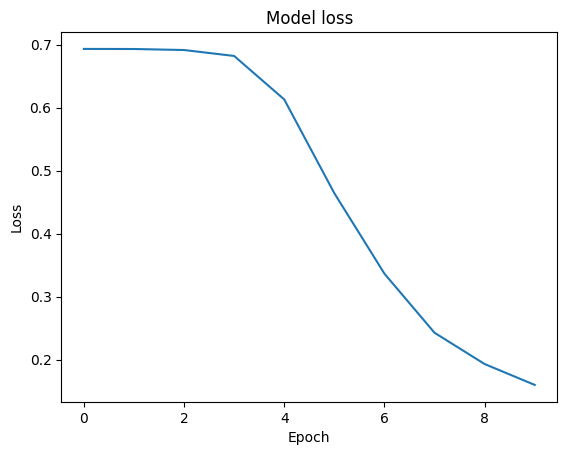

In [98]:
# This will be our training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

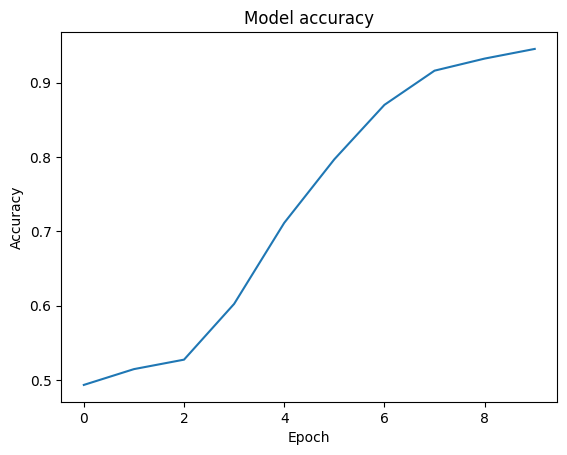

In [99]:
# This will be our accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

As you can see, as we trained the model, the loss decreased and the accuracy increased. This is a good sign.
Lets now try getting the AI to predict whether a sentence is positive or negative from a user input.
We also want to predict on test data just to see how the outputs might looks like.

# How to tell what your AI friend is saying
- **0.00:** It is 0% confident that the sentence is positive
- **0.50:** It is 50% confident that the sentence is positive
- **1.00:** It is 100% confident that the sentence is positive

In [101]:
# Predict on test data
prediction = model.predict(X_test)
print(prediction[:5])

# New data
raw_input = input("Enter a sentence: ")
print('User sentence:', raw_input)
encoded_input = tokenizer.texts_to_sequences([raw_input])
padded_input = pad_sequences(encoded_input)

prediction = model.predict(padded_input)
print("The probability of the sentence being positive is: ", "{:.{precision}f}".format(float(prediction[0][0]), precision=4))

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 3ms/step
[[0.00615509]
 [0.00586868]
 [0.00681347]
 [0.276614  ]
 [0.41824052]]
User sentence: This HPD1155 guy is awesome! He makes everything so cool and great. His walkthrough was great too!
1/1 [==============================] - 0s 13ms/step
The probability of the sentence being positive is:  1.0000


That is it for this project. Thank you guys!!

# Contact
You can contact me through discord @encrypted.dll